# Some Examples to Compare AM with AS

This notebook compares the methods of Active Subspaces and Active Manifolds for the visualization and approximation of scalar-valued functions which depend on some number of parameters.  

In particular, we examine the "toy" functions

$$\begin{align}
    f(\mathbf{x}) &= |\mathbf{x}|^2, \\
    f(x,y) &= \sin(8x) + \sin(8y), \\
    f(x,y) &= \arctan{(y/x)},
\end{align}$$

as well as (real and fabricated) data for Magnetohydrodynamic (MHD) flow.  In particular, we consider the following model problems whose explanation and analysis follow [Glaws et al, 2016](https://arxiv.org/abs/1609.01255) and [Bridges et al, 2019](https://arxiv.org/abs/1904.133860).  See also [Paul Constantine's MHD notebook](https://github.com/paulcon/as-data-sets/blob/master/MHD/MHD.ipynb) for further explanation related to AS.

##### The Hartmann Problem

The Hartmann problem models laminar flow between parallel plates and admits closed-form analytical solutions in terms of its input parameters. Two quantities of interest will be examined: average flow velocity, $u_{avg}$, and induced magnetic field, $B_{ind}$, whose solutions are

$$
u_{avg} = -\frac{\partial p_0}{\partial x}\frac{\eta}{B_0^2}\left(1 - \frac{B_0l}{\sqrt{\eta\mu}}\coth\left(\frac{B_0l}{\sqrt{\eta\mu}}\right)\right), \\
B_{ind} = \frac{\partial p_0}{\partial x}\frac{l\mu_0}{2B_0}\left(1 - 2\frac{\sqrt{\eta\mu}}{B_0l}\tanh\left(\frac{B_0l}{2\sqrt{\eta\mu}}\right)\right).
$$

There are 5 input parameters to this problem: ($\mathbf x = \left[\begin{matrix}\log(\mu) & \log(\rho) & \log(\frac{\partial p_0}{\partial x}) & \log(\eta) & \log(B_0)\end{matrix}\right]^T$, since $l$ is fixed and $\mu_0$ is a physical constant). Samples are drawn randomly with uniform density, with ranges summarized below.

Variable | $\ $ Notation $\ $ | Range $\ \ \ \ \ $
:--------|:--------:|:------------
Fluid Viscosity | $\log(\mu)$ | [log(.05), log(.2)]
Fluid Density | $\log(\rho)$ | [log(1), log(5)]
Applied Pressure Gradient | $\log(\frac{\partial p_0}{\partial x})$ | [log(.5), log(3)]
Resistivity | $\log(\eta)$ | [log(.5), log(3)]
Applied Magnetic Field | $\log(B_0)$ | [log(.1), log(1)]


##### MHD Generator Problem

Following this, we consider a model that describes 3D duct flow in an idealized MHD generator. The variable input parameters are the same as those in the Hartmann problem (with uniform densities), but they have different ranges which are summarized below.

Variable | $\ $ Notation $\ $ | Range $\ \ \ \ \ $
:--------|:--------:|:------------
Fluid Viscosity | $\log(\mu)$ | [log(.001), log(.01)]
Fluid Density | $\log(\rho)$ | [log(.1), log(10)]
Applied Pressure Gradient | $\log(\frac{\partial p_0}{\partial x})$ | [log(.1), log(.5)]
Resistivity | $\log(\eta)$ | [log(.1), log(10)]
Applied Magnetic Field | $\log(B_0)$ | [log(.1), log(1)]

The quantities of interest are again $u_{avg}$ and $B_{ind}$. Note that each run of the model takes about 5 CPU-hours.

In [75]:
# Path stuff 
import sys
sys.path.insert(0, "/Users/anthonygruber/Desktop/Projects/AMv2/src")

# Some standard imports
import numpy as np
import pandas as pd
import scipy as sy
from sklearn import preprocessing

# Handwritten code
import basicFuncs as bf
import numethod as nm

## Toy functions

First, consider how well AM performs given an excess of data. This example predicts $f(x) = |x|^2$ given $30^3$ uniformly distributed points in the unit hypercube $[-1,1]^3$.  Compared to a 2-D Active Subspace, the errors are nearly 100 times smaller.

The Relative L1 Error is 0.446877%
The Relative L2 Error is 0.396809%
The dimension of the Active Subspace is 2
The R^2 value of the response surface is 0.5293
The Relative L1 Error is 27.432192%
The Relative L2 Error is 31.757968%


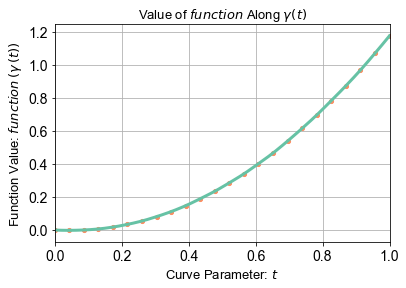

In [77]:
## f(x) = |x|^2 with 3 dims, a uniform grid of 30^3 points, and 1/3 test fraction.
## Took 247 seconds for the paper, now takes ~5 due to the new approximation method.
mesh, fSamples, paths, realgrads = nm.build_uniform_data( 3, 30, bf.Squaresum, bf.gradSquaresum)
nm.manifoldEx( mesh, fSamples, realgrads, 0.05, 0.33, nm.get_random_init_pt(3))
nm.subspEx( mesh, fSamples, realgrads, 2, 0, .33, False, True)

Repeating this experiment with much less data, consider 500 randomly generated samples in $[-1,1]^5$.  AM still outperforms even a 4-D Active Subspace, although the errors are stil relatively large.

The Relative L1 Error is 10.993401%
The Relative L2 Error is 11.758535%


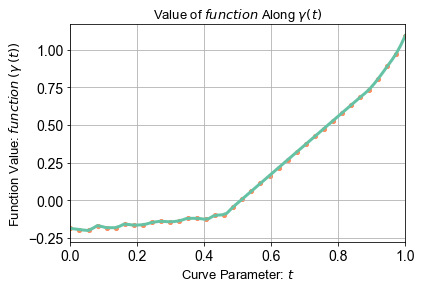

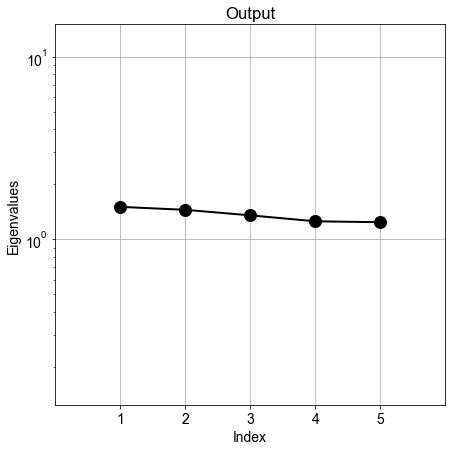

The dimension of the Active Subspace is 4
The Relative L1 Error is 15.719512%
The Relative L2 Error is 19.287660%


In [76]:
# Experiment on f(x) = |x|^2 with 5 dimensions. 
# Errors are not great, but they beat even a 4-D Active Subspace.
mesh, fSamples, paths, realgrads = nm.build_random_data( 5, 500, bf.Squaresum, bf.gradSquaresum)
nm.manifoldEx( mesh, fSamples, realgrads, 0.05, 50, nm.get_random_init_pt(5), 0, True)
nm.subspEx(mesh, fSamples, realgrads, 4, 0, .2, True)

We can also consider functions with many critical points, e.g. $f(x,y) = \sin(8x) + \sin(8y)$.  Given enough data, AM still performs reasonably well on this while AS struggles (even when not reducing the dimension at all).

The Relative L1 Error is 3.766944%
The Relative L2 Error is 5.942179%


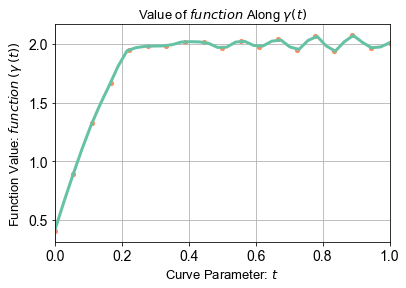

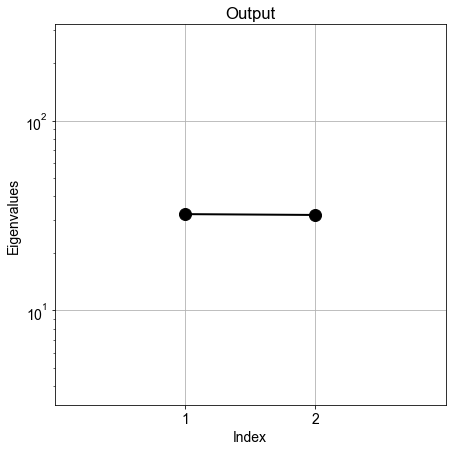

The dimension of the Active Subspace is 2
The R^2 value of the response surface is 0.0128
The Relative L1 Error is 99.462390%
The Relative L2 Error is 99.806654%


In [82]:
## Remember that function f(x,y) = sin(8x) + sin(8y) with a ton of critical points?
## Absolutely no problem now.
mesh, fSamples, paths, realgrads = nm.build_random_data( 2, 1000, bf.uhoh, bf.graduhoh)
nm.manifoldEx( mesh, fSamples, realgrads, 0.05, 0.2, nm.get_random_init_pt(2), 0)
nm.subspEx( mesh, fSamples, realgrads, 2, 0, .2, True, True)

Functions with singular gradient are even okay using AM, since everything is done locally.  Consider the argument function $f(x,y) = \arctan(y/x), which is well-approximated despite its singularity at the origin.  Once again, such function is not suitable for AS approximation.

On the other hand, the plot clearly indicates that the AM spirals several times, which is not really optimal -- something to be fixed eventually.  

The Relative L1 Error is 1.885251%
The Relative L2 Error is 2.464159%


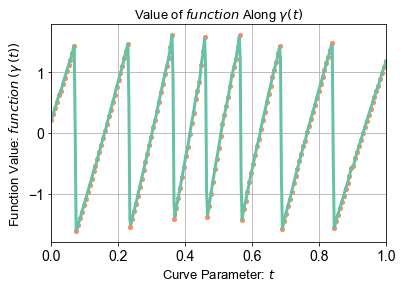

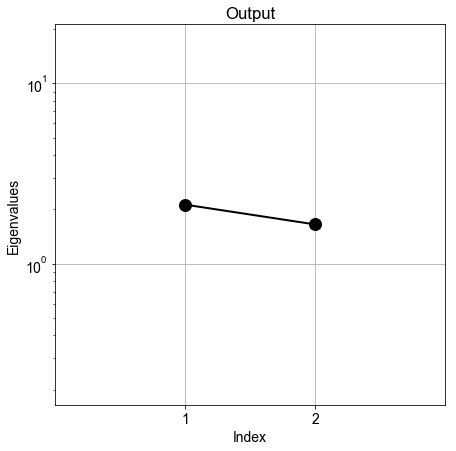

The dimension of the Active Subspace is 2


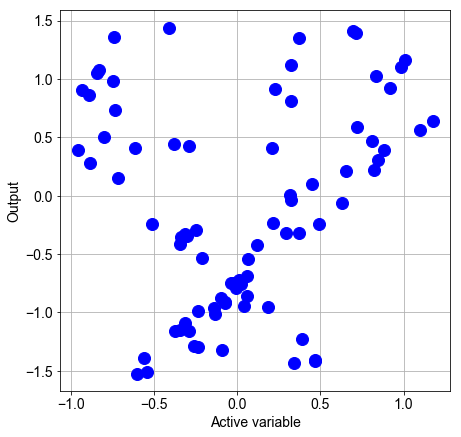

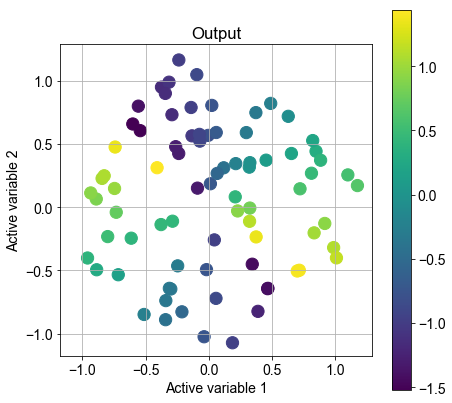

The Relative L1 Error is 34.686337%
The Relative L2 Error is 43.559615%


In [37]:
mesh, fSamples, paths, realgrads = nm.build_random_data( 2, 100, bf.f4, bf.gradf4)
nm.manifoldEx( mesh, fSamples, realgrads, 0.1, 0.2, nm.get_random_init_pt(2), 0)
nm.subspEx( mesh, fSamples, realgrads, 2, 0, .2, True, False)

## Hartmann Simulation

Here we compare a 2-dimensional AS with the (necessarily) 1-dimensional AM on the Hartmann problem from before.  

With AM we see large improvements in both cases, indicating that the behavior of these quantities is inherently nonlinear.

The Relative L1 Error is 9.458066%
The Relative L2 Error is 13.824003%


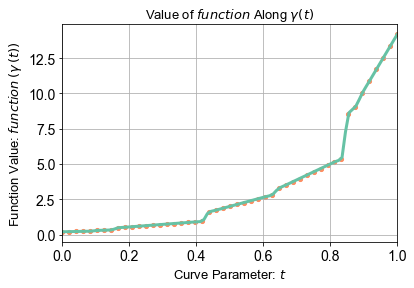

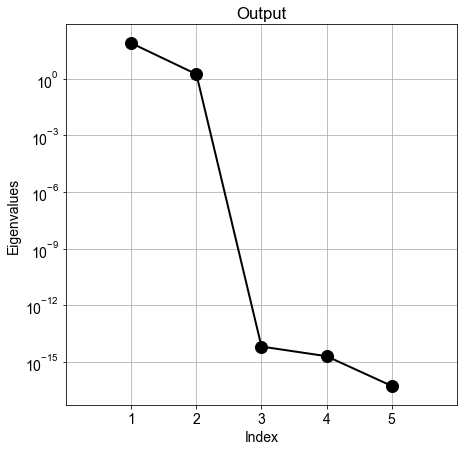

The dimension of the Active Subspace is 2
The R^2 value of the response surface is 0.8954
The Relative L1 Error is 32.197091%
The Relative L2 Error is 25.406746%
 
The Relative L1 Error is 12.370590%
The Relative L2 Error is 13.316843%


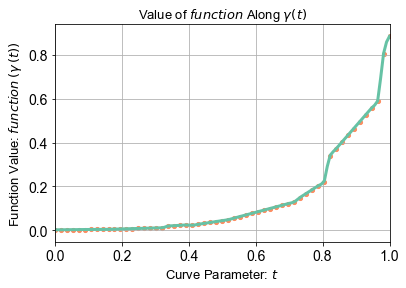

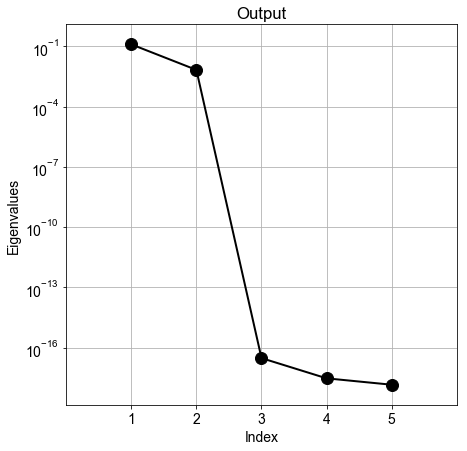

The dimension of the Active Subspace is 2
The R^2 value of the response surface is 0.8148
The Relative L1 Error is 49.709337%
The Relative L2 Error is 39.925605%


In [83]:
## Can also do all the MHD stuff from the paper faster and more accurately.
## Takes maybe ~5s each (or less).
meshy = nm.make_mesh( 5, 5)
tree = sy.spatial.KDTree( meshy)
u, pathsu, rgu = bf.get_u_avg_data( meshy)
b, pathsb, rgb = bf.get_b_ind_data( meshy)

## Hartmann for u
nm.manifoldEx( meshy, u, rgu, 0.05, 0.2, nm.get_random_init_pt(5), 0)
nm.subspEx( meshy, u, rgu, 2, 0, 0.2, True, True)
# am,fvals = nm.build_AM_from_data( nm.get_random_init_pt(5), meshy, u, pathsu, rgu, 0.01)
# nm.splinePlot( am, fvals, 'u_{avg}', '{Hu}')

print(" ")

## Hartmann for B
nm.manifoldEx( meshy, b, rgb, 0.05, 0.2, nm.get_random_init_pt(5), 0)
nm.subspEx( meshy, b, rgb, 2, 0, .2, True, True)
# am,fvals = nm.build_AM_from_data( nm.get_random_init_pt(5), meshy, b, pathsb, rgb, 0.01)
# nm.splinePlot( am,fvals,'B_{ind}','{HB}')

## MHD Generator Problem

Here we consider the idealized MHD generator model from before.  The training data are 483 input samples which are randomly distributed across the 5-dimensional parameter space.

In this case, AM yields a small improvement on predicting $u_{avg}$ and a larger improvement on predicting $B_{ind}$.  This is not surprising given the eigenvalue plots, which do not decrease as sharply for $B_{ind}$.

AM relative errors (u):
The Relative L1 Error is 5.172105%
The Relative L2 Error is 8.553165%


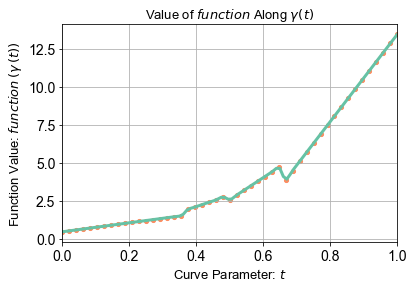

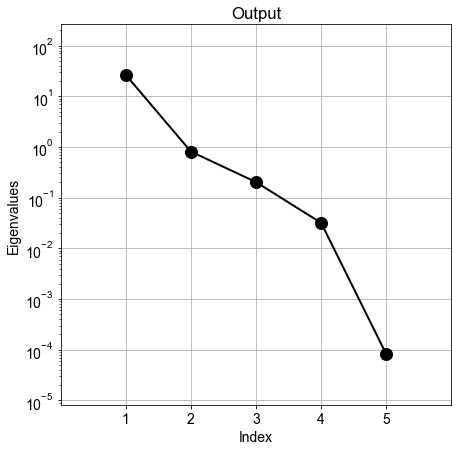

The dimension of the Active Subspace is 2


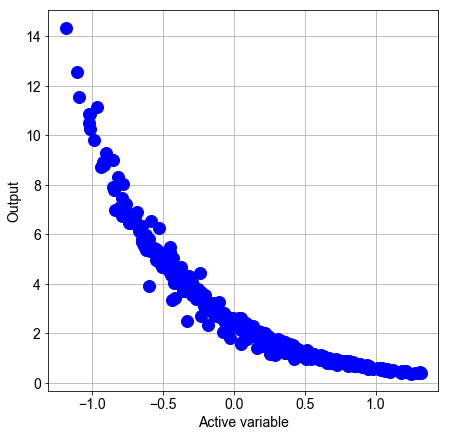

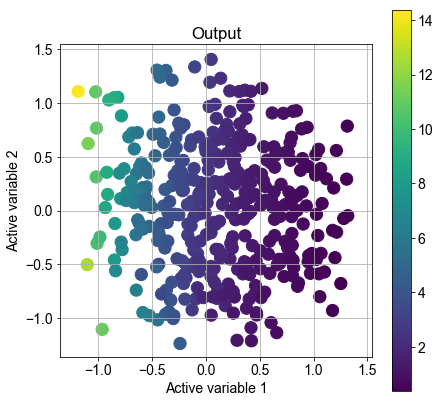

The Relative L1 Error is 8.382417%
The Relative L2 Error is 8.971334%
 
AM relative errors (B):
The Relative L1 Error is 10.451714%
The Relative L2 Error is 12.047158%


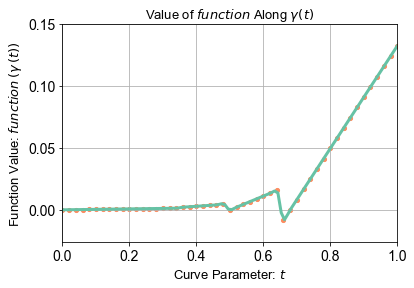

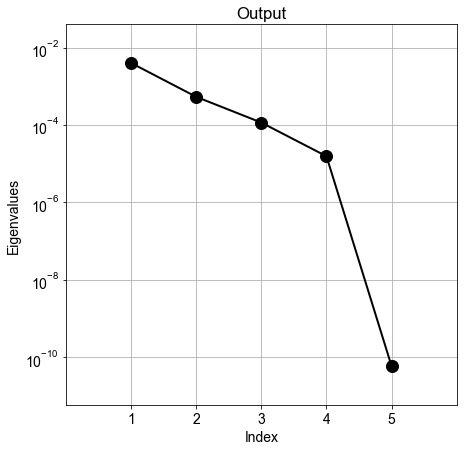

The dimension of the Active Subspace is 2


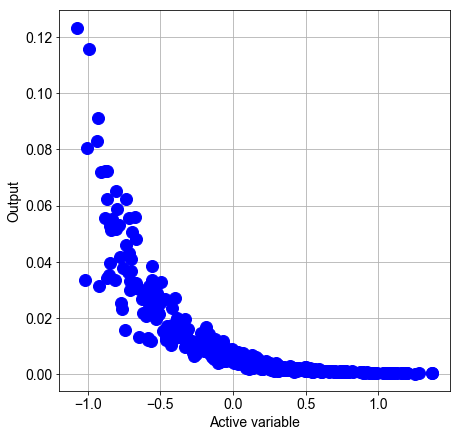

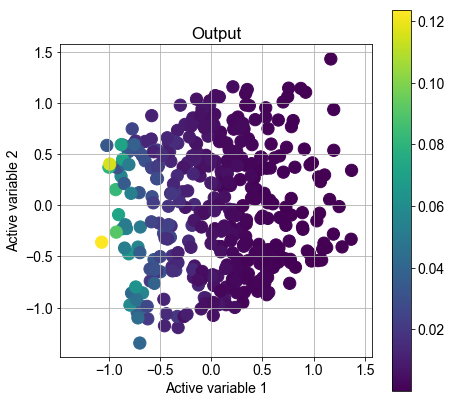

The Relative L1 Error is 34.383302%
The Relative L2 Error is 28.758762%


In [85]:
## Setup for real data MHD
# Load data from data files
data = pd.read_csv('/Users/anthonygruber/Desktop/Projects/AMv2/data/MHD/MHD_Generator_Data_Uavg.txt').values
Xu = data[:,1:6]; u = data[:,6]; du = data[:,7:]

data = pd.read_csv('/Users/anthonygruber/Desktop/Projects/AMv2/data/MHD/MHD_Generator_Data_Bind.txt').values
XB = data[:,1:6]; B = data[:,6]; dB = data[:,7:]

# New upper/lower bounds
lb = np.log(np.array([.001, .1, .1, .1, .1]))
ub = np.log(np.array([.01, 10, .5, 10, 1]))

# Scale gradients according to the chain rule, get normalized inputs
realdu = .5*(ub - lb)*Xu*du; XXu = 2*(np.log(Xu) - lb)/(ub - lb) - 1
realdB = .5*(ub - lb)*XB*dB; XXB = 2*(np.log(XB) - lb)/(ub - lb) - 1

## MHD for u
print("AM relative errors (u):")
nm.manifoldEx( XXu, u, realdu, 0.05, 0.2, nm.get_random_init_pt(5), 0)
nm.subspEx( XXu, u, realdu, 2, 0, .2, True, False)

print(" ")

## MHD for B
print("AM relative errors (B):")
nm.manifoldEx( XXB, B, realdB, 0.05, 97, nm.get_random_init_pt(5), 0)
nm.subspEx( XXB, B, realdB, 2, 0, .2, True, False)